## sw

Development of mse

$\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} = \hat{h^ \prime} \ \text{NetLW} ^ \prime + \hat{h^ \prime} \ \text{SEF} ^ \prime + \hat{h^ \prime} \ \textcolor{lightblue}{\text{NetSW}} ^ \prime - \hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}$

$\textcolor{lightblue}{\text{NetSW}} = \textcolor{lightblue}{\text{rsus}} - \textcolor{lightblue}{\text{rsds}} - \textcolor{lightblue}{\text{rsut}}$

In [ ]:
import xarray as xr

import numpy as np
import skimage.measure as skm
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os
from funcs.vars.myPlots import *

In [ ]:
model='MPI-ESM1-2-HR'
experiment_id='historical'

In [ ]:
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_netsw_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 384, time: 10957)
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31
Data variables:
    netsw    (time, lat, lon) float32 ...

### snapshots

In [ ]:
netsw = ds.netsw
netsw

<xarray.DataArray 'netsw' (time: 10957, lat: 64, lon: 384)>
[269279232 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31

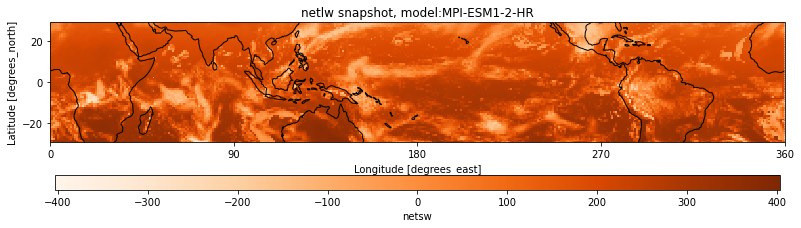

In [ ]:
plot_snapshot(netsw.isel(time=0), 'Oranges', 'netsw', model)

In [ ]:
netsw_mean = netsw.mean(dim=('lat','lon'))
np.shape(netsw_mean)

(10957,)

In [ ]:
netsw_anom = netsw - netsw_mean
np.shape(netsw_anom)

(10957, 64, 384)

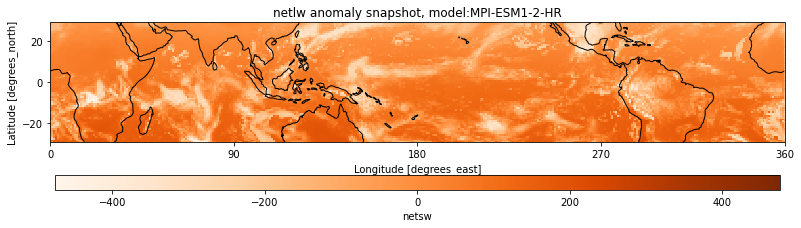

In [ ]:
plot_snapshot(netsw_anom.isel(time=0), 'Oranges', 'netsw anomaly', model)

In [ ]:
print(np.shape(mse_anom))
print(np.shape(netlw_anom))

(10957, 64, 384)
(10957, 64, 384)


### $\hat{h^ \prime} \ \text{NetSW}$

In [ ]:
netsw_corr = mse_anom.data * netsw_anom.data
print(np.shape(netsw_corr))

(10957, 64, 384)


In [ ]:
netsw_corr = xr.DataArray(
    data=netsw_corr[0:-1],
    dims=['time', 'lat', 'lon'],
    coords={'time': mse_anom.time.data[0:-1], 'lat': mse_anom.lat.data, 'lon': mse_anom.lon.data},
    attrs={'units':''}
    )

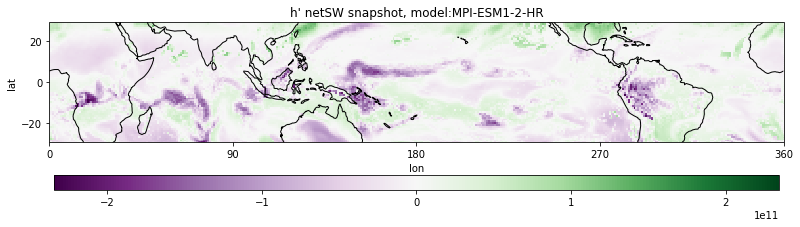

In [ ]:
plot_snapshot(netsw_corr.isel(time=0), 'PRGn', 'h\' netSW', model)

In [ ]:
netsw_corrsMean = netsw_corr.mean(dim=('lat','lon'))

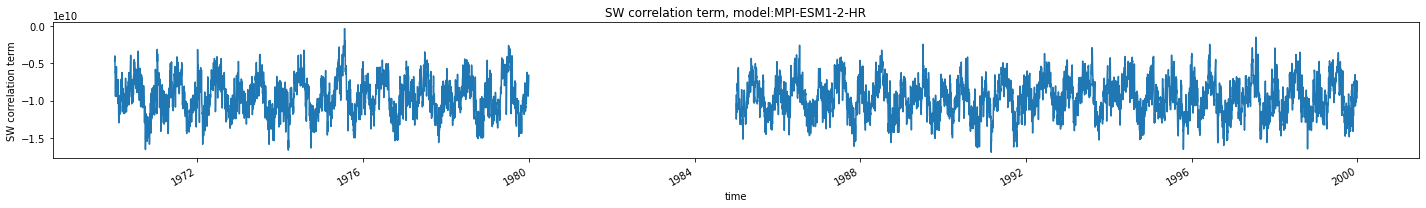

In [ ]:
plot_timeseries(netsw_corrsMean, 'SW correlation term', model)